## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  98.912227  1704.777182  0.186964  1.206070  1.298039
1  47.290905   446.176655  0.518285  9.064943  1.398048
2  13.761967   757.992932  0.275272  9.594053  1.751217
3  73.512938  1289.143413  0.914959  8.259647  1.575145
4  12.474604  1734.212839  0.590144  2.450089  1.683323


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471
0:	learn: 0.9783263	total: 57ms	remaining: 57s


1:	learn: 0.9701473	total: 58.6ms	remaining: 29.3s
2:	learn: 0.9600817	total: 59.9ms	remaining: 19.9s
3:	learn: 0.9510224	total: 60.4ms	remaining: 15s
4:	learn: 0.9423532	total: 62.3ms	remaining: 12.4s
5:	learn: 0.9364197	total: 63.5ms	remaining: 10.5s
6:	learn: 0.9262320	total: 64ms	remaining: 9.07s
7:	learn: 0.9183768	total: 64.5ms	remaining: 8s
8:	learn: 0.9077912	total: 65.4ms	remaining: 7.2s
9:	learn: 0.8992328	total: 66ms	remaining: 6.54s
10:	learn: 0.8904579	total: 66.7ms	remaining: 6s
11:	learn: 0.8812397	total: 67.5ms	remaining: 5.56s
12:	learn: 0.8734173	total: 68.9ms	remaining: 5.23s
13:	learn: 0.8669630	total: 69.8ms	remaining: 4.92s
14:	learn: 0.8587498	total: 70.6ms	remaining: 4.63s
15:	learn: 0.8505188	total: 71.1ms	remaining: 4.37s
16:	learn: 0.8422288	total: 71.5ms	remaining: 4.13s
17:	learn: 0.8333936	total: 72ms	remaining: 3.93s
18:	learn: 0.8272933	total: 72.4ms	remaining: 3.74s
19:	learn: 0.8207287	total: 74.2ms	remaining: 3.63s
20:	learn: 0.8120506	total: 75.5ms	r

144:	learn: 0.3457136	total: 166ms	remaining: 981ms
145:	learn: 0.3441834	total: 167ms	remaining: 978ms
146:	learn: 0.3430141	total: 168ms	remaining: 977ms
147:	learn: 0.3408371	total: 169ms	remaining: 974ms
148:	learn: 0.3390451	total: 170ms	remaining: 970ms
149:	learn: 0.3371341	total: 171ms	remaining: 967ms
150:	learn: 0.3360402	total: 171ms	remaining: 963ms
151:	learn: 0.3345701	total: 172ms	remaining: 959ms
152:	learn: 0.3331904	total: 173ms	remaining: 956ms
153:	learn: 0.3317430	total: 173ms	remaining: 952ms
154:	learn: 0.3303590	total: 174ms	remaining: 947ms
155:	learn: 0.3285205	total: 175ms	remaining: 946ms
156:	learn: 0.3270233	total: 176ms	remaining: 943ms
157:	learn: 0.3252035	total: 176ms	remaining: 939ms
158:	learn: 0.3240923	total: 177ms	remaining: 936ms
159:	learn: 0.3225891	total: 178ms	remaining: 933ms
160:	learn: 0.3212188	total: 178ms	remaining: 928ms
161:	learn: 0.3201120	total: 179ms	remaining: 924ms
162:	learn: 0.3193122	total: 179ms	remaining: 921ms
163:	learn: 

216:	learn: 0.2553505	total: 216ms	remaining: 780ms
217:	learn: 0.2545707	total: 217ms	remaining: 780ms
218:	learn: 0.2533144	total: 219ms	remaining: 779ms
219:	learn: 0.2524811	total: 219ms	remaining: 778ms
220:	learn: 0.2511198	total: 220ms	remaining: 775ms
221:	learn: 0.2502216	total: 220ms	remaining: 772ms
222:	learn: 0.2490069	total: 221ms	remaining: 770ms
223:	learn: 0.2481552	total: 222ms	remaining: 768ms
224:	learn: 0.2473599	total: 222ms	remaining: 766ms
225:	learn: 0.2464070	total: 223ms	remaining: 764ms
226:	learn: 0.2451656	total: 224ms	remaining: 761ms
227:	learn: 0.2443648	total: 224ms	remaining: 759ms
228:	learn: 0.2436179	total: 225ms	remaining: 757ms
229:	learn: 0.2427084	total: 226ms	remaining: 755ms
230:	learn: 0.2418392	total: 226ms	remaining: 753ms
231:	learn: 0.2405471	total: 227ms	remaining: 751ms
232:	learn: 0.2400360	total: 228ms	remaining: 750ms
233:	learn: 0.2394308	total: 229ms	remaining: 749ms
234:	learn: 0.2386215	total: 229ms	remaining: 746ms
235:	learn: 

367:	learn: 0.1719629	total: 323ms	remaining: 554ms
368:	learn: 0.1712355	total: 324ms	remaining: 554ms
369:	learn: 0.1711311	total: 325ms	remaining: 553ms
370:	learn: 0.1704948	total: 326ms	remaining: 553ms
371:	learn: 0.1703013	total: 327ms	remaining: 551ms
372:	learn: 0.1695991	total: 327ms	remaining: 550ms
373:	learn: 0.1689639	total: 328ms	remaining: 549ms
374:	learn: 0.1687762	total: 329ms	remaining: 548ms
375:	learn: 0.1684911	total: 329ms	remaining: 546ms
376:	learn: 0.1675569	total: 330ms	remaining: 545ms
377:	learn: 0.1666681	total: 330ms	remaining: 544ms
378:	learn: 0.1664862	total: 331ms	remaining: 543ms
379:	learn: 0.1656412	total: 332ms	remaining: 541ms
380:	learn: 0.1654618	total: 333ms	remaining: 541ms
381:	learn: 0.1645623	total: 333ms	remaining: 540ms
382:	learn: 0.1643859	total: 334ms	remaining: 538ms
383:	learn: 0.1635971	total: 334ms	remaining: 537ms
384:	learn: 0.1634240	total: 335ms	remaining: 536ms
385:	learn: 0.1625526	total: 336ms	remaining: 534ms
386:	learn: 

438:	learn: 0.1395065	total: 372ms	remaining: 475ms
439:	learn: 0.1388967	total: 372ms	remaining: 474ms
440:	learn: 0.1383774	total: 374ms	remaining: 474ms
441:	learn: 0.1378979	total: 375ms	remaining: 473ms
442:	learn: 0.1377999	total: 376ms	remaining: 472ms
443:	learn: 0.1372092	total: 376ms	remaining: 471ms
444:	learn: 0.1371120	total: 377ms	remaining: 470ms
445:	learn: 0.1366048	total: 377ms	remaining: 469ms
446:	learn: 0.1360382	total: 378ms	remaining: 468ms
447:	learn: 0.1357207	total: 379ms	remaining: 466ms
448:	learn: 0.1354099	total: 379ms	remaining: 465ms
449:	learn: 0.1351055	total: 380ms	remaining: 464ms
450:	learn: 0.1347684	total: 381ms	remaining: 463ms
451:	learn: 0.1343078	total: 381ms	remaining: 462ms
452:	learn: 0.1340125	total: 382ms	remaining: 462ms
453:	learn: 0.1337233	total: 383ms	remaining: 461ms
454:	learn: 0.1331711	total: 384ms	remaining: 460ms
455:	learn: 0.1328873	total: 384ms	remaining: 459ms
456:	learn: 0.1325672	total: 385ms	remaining: 457ms
457:	learn: 

600:	learn: 0.0900737	total: 483ms	remaining: 321ms
601:	learn: 0.0900322	total: 484ms	remaining: 320ms
602:	learn: 0.0898828	total: 485ms	remaining: 319ms
603:	learn: 0.0894229	total: 486ms	remaining: 318ms
604:	learn: 0.0890812	total: 486ms	remaining: 318ms
605:	learn: 0.0887476	total: 487ms	remaining: 317ms
606:	learn: 0.0887064	total: 488ms	remaining: 316ms
607:	learn: 0.0884368	total: 488ms	remaining: 315ms
608:	learn: 0.0883960	total: 489ms	remaining: 314ms
609:	learn: 0.0882504	total: 490ms	remaining: 313ms
610:	learn: 0.0882101	total: 491ms	remaining: 312ms
611:	learn: 0.0878868	total: 491ms	remaining: 311ms
612:	learn: 0.0878470	total: 492ms	remaining: 310ms
613:	learn: 0.0876136	total: 492ms	remaining: 309ms
614:	learn: 0.0875743	total: 493ms	remaining: 309ms
615:	learn: 0.0875355	total: 494ms	remaining: 308ms
616:	learn: 0.0872961	total: 494ms	remaining: 307ms
617:	learn: 0.0872578	total: 495ms	remaining: 306ms
618:	learn: 0.0872200	total: 496ms	remaining: 305ms
619:	learn: 

667:	learn: 0.0785549	total: 531ms	remaining: 264ms
668:	learn: 0.0783048	total: 533ms	remaining: 264ms
669:	learn: 0.0780332	total: 534ms	remaining: 263ms
670:	learn: 0.0777257	total: 535ms	remaining: 262ms
671:	learn: 0.0773629	total: 535ms	remaining: 261ms
672:	learn: 0.0770330	total: 536ms	remaining: 260ms
673:	learn: 0.0768006	total: 537ms	remaining: 260ms
674:	learn: 0.0765436	total: 537ms	remaining: 259ms
675:	learn: 0.0763070	total: 538ms	remaining: 258ms
676:	learn: 0.0760748	total: 539ms	remaining: 257ms
677:	learn: 0.0758469	total: 540ms	remaining: 256ms
678:	learn: 0.0756106	total: 541ms	remaining: 256ms
679:	learn: 0.0753874	total: 541ms	remaining: 255ms
680:	learn: 0.0751565	total: 542ms	remaining: 254ms
681:	learn: 0.0749304	total: 543ms	remaining: 253ms
682:	learn: 0.0747124	total: 543ms	remaining: 252ms
683:	learn: 0.0744915	total: 544ms	remaining: 251ms
684:	learn: 0.0740956	total: 545ms	remaining: 250ms
685:	learn: 0.0738688	total: 545ms	remaining: 250ms
686:	learn: 

816:	learn: 0.0480187	total: 640ms	remaining: 143ms
817:	learn: 0.0478471	total: 641ms	remaining: 143ms
818:	learn: 0.0476805	total: 642ms	remaining: 142ms
819:	learn: 0.0476293	total: 642ms	remaining: 141ms
820:	learn: 0.0474607	total: 643ms	remaining: 140ms
821:	learn: 0.0472667	total: 644ms	remaining: 139ms
822:	learn: 0.0472164	total: 644ms	remaining: 139ms
823:	learn: 0.0471139	total: 645ms	remaining: 138ms
824:	learn: 0.0469043	total: 646ms	remaining: 137ms
825:	learn: 0.0467203	total: 647ms	remaining: 136ms
826:	learn: 0.0466207	total: 647ms	remaining: 135ms
827:	learn: 0.0464690	total: 648ms	remaining: 135ms
828:	learn: 0.0463855	total: 648ms	remaining: 134ms
829:	learn: 0.0462394	total: 649ms	remaining: 133ms
830:	learn: 0.0460605	total: 650ms	remaining: 132ms
831:	learn: 0.0459788	total: 651ms	remaining: 131ms
832:	learn: 0.0457954	total: 651ms	remaining: 131ms
833:	learn: 0.0456116	total: 652ms	remaining: 130ms
834:	learn: 0.0455313	total: 653ms	remaining: 129ms
835:	learn: 

887:	learn: 0.0406406	total: 691ms	remaining: 87.1ms
888:	learn: 0.0405400	total: 692ms	remaining: 86.4ms
889:	learn: 0.0404815	total: 693ms	remaining: 85.6ms
890:	learn: 0.0404122	total: 693ms	remaining: 84.8ms
891:	learn: 0.0402627	total: 694ms	remaining: 84ms
892:	learn: 0.0401640	total: 695ms	remaining: 83.3ms
893:	learn: 0.0400607	total: 696ms	remaining: 82.5ms
894:	learn: 0.0399928	total: 697ms	remaining: 81.7ms
895:	learn: 0.0399640	total: 697ms	remaining: 80.9ms
896:	learn: 0.0398669	total: 698ms	remaining: 80.2ms
897:	learn: 0.0397717	total: 699ms	remaining: 79.4ms
898:	learn: 0.0396282	total: 699ms	remaining: 78.6ms
899:	learn: 0.0395619	total: 700ms	remaining: 77.8ms
900:	learn: 0.0394150	total: 701ms	remaining: 77ms
901:	learn: 0.0393503	total: 701ms	remaining: 76.2ms
902:	learn: 0.0392614	total: 702ms	remaining: 75.4ms
903:	learn: 0.0391681	total: 702ms	remaining: 74.6ms
904:	learn: 0.0390813	total: 703ms	remaining: 73.8ms
905:	learn: 0.0389900	total: 704ms	remaining: 73ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.5625008952112471


ABC Pre-generator MAE 1.0490729695958856


# mGAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

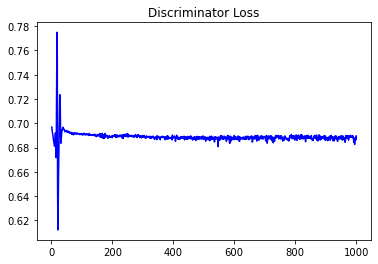

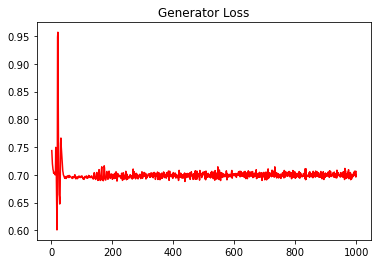

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MAE")
print(mean(ABC_GAN1_metrics[1]))

MAE
0.4504480913989246


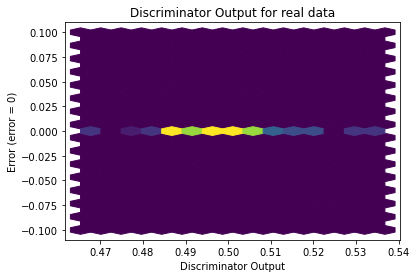

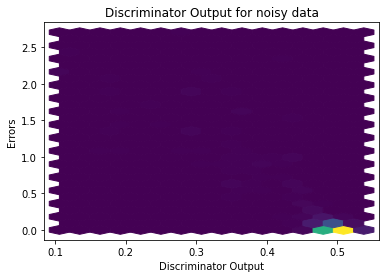

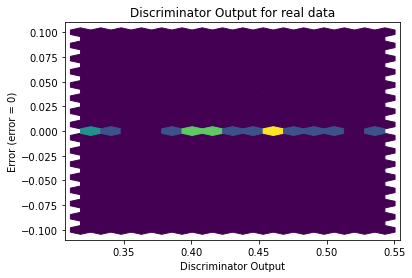

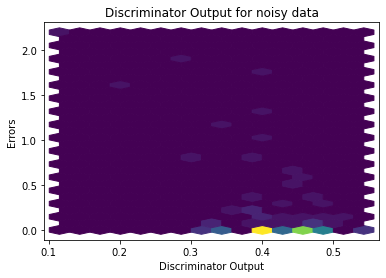

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

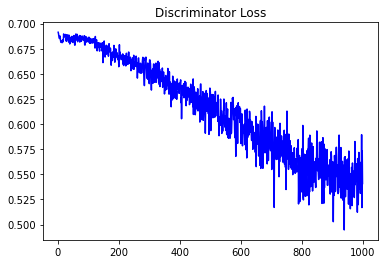

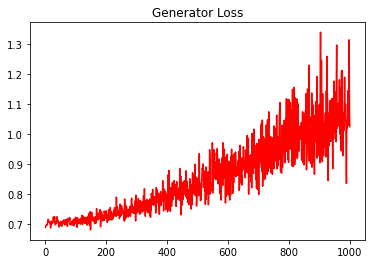

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.6145227035060525


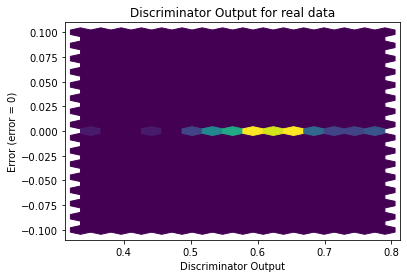

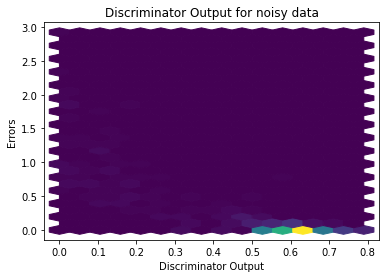

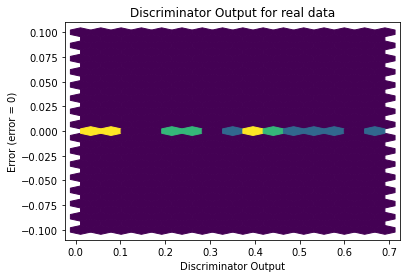

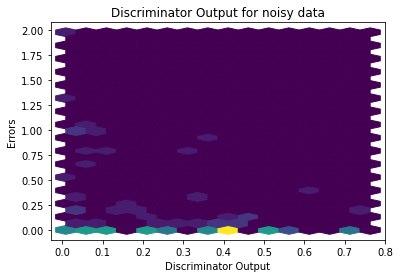

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


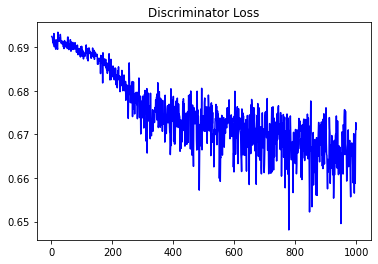

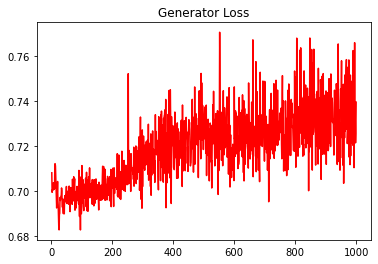

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.49788428783108246


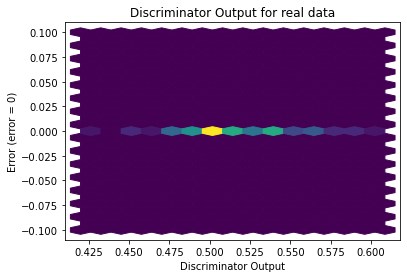

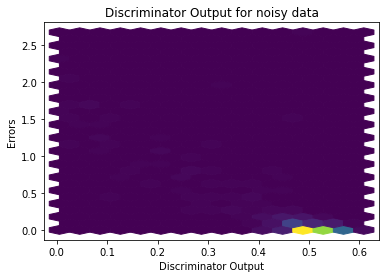

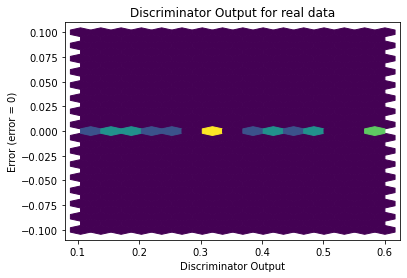

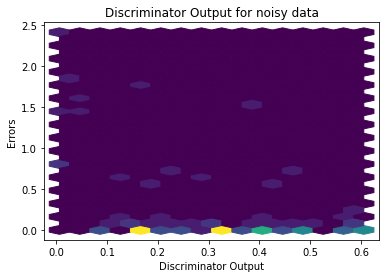

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


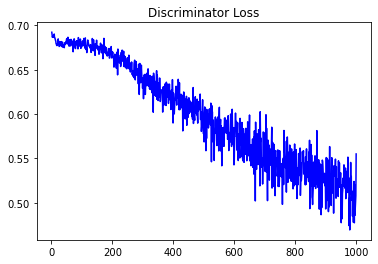

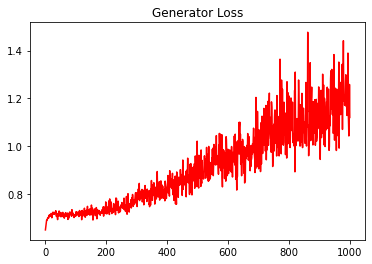

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.591382690497674


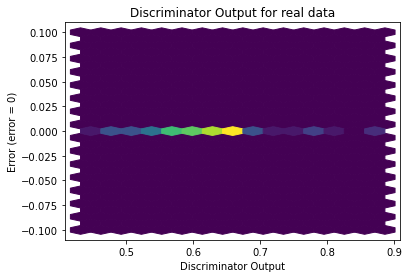

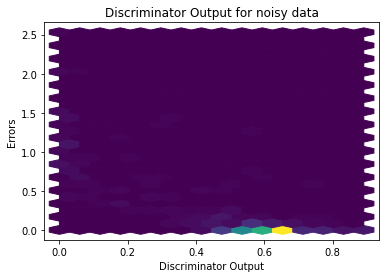

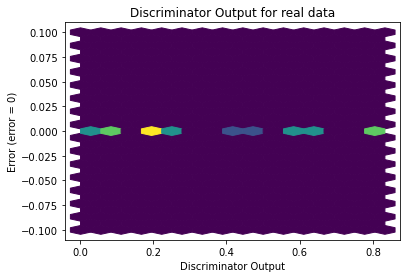

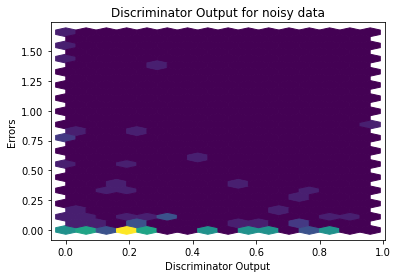

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.3142]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.8767]], requires_grad=True)
